In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
from shutil import copy
from zipfile import ZipFile
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Activation,Flatten,GlobalAveragePooling2D
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from matplotlib import pyplot as plt
from matplotlib import image
from sklearn.model_selection import KFold

from tensorflow.keras.applications import MobileNet,VGG19,InceptionV3,ResNet152V2,InceptionResNetV2,Xception,DenseNet201, DenseNet169
from tensorflow.keras.applications import MobileNet, DenseNet169, ResNet50, EfficientNetB2, EfficientNetB4, Xception, InceptionV3
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,GlobalMaxPooling2D,Conv2D,MaxPooling2D,ZeroPadding2D,AvgPool2D,Input,Lambda,Concatenate,LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from matplotlib import pyplot as plt
import numpy as np
import cv2
from matplotlib import image
from keras import applications
from keras.utils.vis_utils import plot_model

In [ ]:
data_path = "/content/drive/MyDrive/CSE572-DM/Final_Project/new_data/"

In [ ]:
train_set = data_path + 'train/'
val_set = data_path + 'valid/'
test_set = data_path + 'test/'
epochs = 50

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1. / 255
)
val_datagen= ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1. / 255)
test_datagen= ImageDataGenerator(
    rescale=1. / 255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 8,
    shuffle=True,
    class_mode = 'categorical')
validation_generator = test_datagen.flow_from_directory(
    val_set,
    target_size = (224,224),
    batch_size = 8,
    shuffle=True,
    class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [ ]:
def load_models(SHAPE):
    vgg19 = VGG19(weights = 'imagenet', include_top = False, input_shape = SHAPE)
    resnet = ResNet152V2(weights = 'imagenet', include_top = False, input_shape = SHAPE)
    mobilenet = MobileNet(weights = 'imagenet', include_top = False, input_shape = SHAPE)
    inception = InceptionV3(weights = 'imagenet', include_top = False, input_shape = SHAPE)
    inception_resnet = InceptionResNetV2(weights = 'imagenet', include_top = False, input_shape = SHAPE)
    xception = Xception(weights = 'imagenet', include_top = False, input_shape = SHAPE)
    densenet = DenseNet169(weights = 'imagenet', include_top = False, input_shape = SHAPE)

    # for layer in vgg19.layers:
    #     layer.trainable = False

    # for layer in resnet.layers:
    #     layer.trainable = False

    # for layer in mobilenet.layers:
    #     layer.trainable = False

    # for layer in inception.layers:
    #     layer.trainable = False

    # for layer in inception_resnet.layers:
    #     layer.trainable = False

    # for layer in xception.layers:
    #     layer.trainable = False

    # for layer in densenet.layers:
    #     layer.trainable = False

    return vgg19,resnet,mobilenet,inception,inception_resnet,xception,densenet


In [ ]:
vgg19,resnet,mobilenet,inception,inception_resent,xception,densenet = load_models((224,224,3))

In [ ]:
inp = Input((224,224,3))

In [ ]:
#all major pretrained models
vgg_19 = vgg19(inp)
x_vgg_19 = GlobalMaxPooling2D()(vgg_19)
x_vgg_19 = Flatten()(x_vgg_19)
x_vgg_19 = Dense(16,activation='relu')(x_vgg_19)
x_vgg_19 = Dense(8, activation='relu')(x_vgg_19)

resnet = resnet(inp)
x_resnet = GlobalMaxPooling2D()(resnet)
x_resnet = Flatten()(x_resnet)
x_resnet = Dense(16,activation='relu')(x_resnet)
x_resnet = Dense(8, activation='relu')(x_resnet)


mobilenet = mobilenet(inp)
x_mobilenet = GlobalMaxPooling2D()(mobilenet)
x_mobilenet = Dropout(0.2)(x_mobilenet)
x_mobilenet = Flatten()(x_mobilenet)
x_mobilenet = Dense(16,activation='relu')(x_mobilenet)
x_mobilenet = Dense(8, activation='relu')(x_mobilenet)

inception = inception(inp)
x_inception = GlobalMaxPooling2D()(inception)
x_inception = Flatten()(x_inception)
x_inception = Dropout(0.2)(x_inception)
x_inception = Dense(16,activation='relu')(x_inception)
x_inception = Dense(8, activation='relu')(x_inception)

inception_resent = inception_resent(inp)
x_inception_resent = GlobalMaxPooling2D()(inception_resent)
x_inception_resent = Dropout(0.2)(x_inception_resent)
x_inception_resent = Flatten()(x_inception_resent)
x_inception_resent = Dense(16,activation='relu')(x_inception_resent)
x_inception_resent = Dense(8, activation='relu')(x_inception_resent)

xception = xception(inp)
x_xception = GlobalMaxPooling2D()(xception)
x_xception = Flatten()(x_xception)
x_xception = Dropout(0.2)(x_xception)
x_xception = Dense(16,activation='relu')(x_xception)
x_xception = Dense(8, activation='relu')(x_xception)

densenet = densenet(inp)
x_densenet = GlobalMaxPooling2D()(densenet)
x_densenet = Dropout(0.2)(x_densenet)
x_densenet = Flatten()(x_densenet)
x_densenet = Dense(16,activation='relu')(x_densenet)
x_densenet = Dense(8, activation='relu')(x_densenet)

In [ ]:
x = Concatenate()([x_densenet,x_mobilenet])
out = Dense(4, activation='sigmoid')(x)
model = Model(inp, out)
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision','Recall'])


model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_36 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 densenet169 (Functional)       (None, 7, 7, 1664)   12642880    ['input_36[0][0]']               
                                                                                                  
 mobilenet_1.00_224 (Functional  (None, 7, 7, 1024)  3228864     ['input_36[0][0]']               
 )                                                                                                
                                                                                           

In [ ]:
filepath =  '/content/saved-model-{epoch:02d}-acc_{val_accuracy:.4f}-pre_{val_precision:.4f}-rec_{val_recall:.4f}.hdf5'

checkpoint = ModelCheckpoint(filepath,
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max')

earlystop = EarlyStopping(
                          monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=5,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.0001)

callbacks = [checkpoint,earlystop,learning_rate_reduction]

In [ ]:
history = model.fit_generator(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator,
    callbacks = callbacks
)

Epoch 1/50


<ipython-input-73-7aa2667a7b13>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


77/77 [==============================] - 41s 287ms/step - loss: 1.5532 - accuracy: 0.3801 - precision: 0.3309 - recall: 0.5856 - val_loss: 2.7669 - val_accuracy: 0.1806 - val_precision: 0.2158 - val_recall: 0.4167 - lr: 0.0010
Epoch 2/50
77/77 [==============================] - 17s 220ms/step - loss: 1.1659 - accuracy: 0.4829 - precision: 0.3350 - recall: 0.6444 - val_loss: 1.1005 - val_accuracy: 0.4722 - val_precision: 0.3301 - val_recall: 0.4722 - lr: 0.0010
Epoch 3/50
77/77 [==============================] - 15s 194ms/step - loss: 1.0333 - accuracy: 0.5318 - precision: 0.3419 - recall: 0.8271 - val_loss: 1.6988 - val_accuracy: 0.4028 - val_precision: 0.3200 - val_recall: 0.2222 - lr: 0.0010
Epoch 4/50
77/77 [==============================] - 17s 221ms/step - loss: 1.1534 - accuracy: 0.4747 - precision: 0.3227 - recall: 0.6623 - val_loss: 0.9427 - val_accuracy: 0.4861 - val_precision: 0.3300 - val_recall: 0.9306 - lr: 0.0010
Epoch 5/50
77/77 [==============================] - 15s 194

In [ ]:
def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)     # get number of epoch with the lowest validation loss
    val_lowest = val_loss[index_loss]    # get the loss value of epoch with the lowest validation loss
    index_acc = np.argmax(val_acc)       # get number of epoch with the highest validation accuracy
    acc_highest = val_acc[index_acc]     # get the loss value of epoch with the highest validation accuracy

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]	       # create x-axis by epochs count
    loss_label = f'best epoch= {str(index_loss + 1)}'  # label of lowest val_loss
    acc_label = f'best epoch= {str(index_acc + 1)}'    # label of highest val_accuracy
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout
    plt.show()

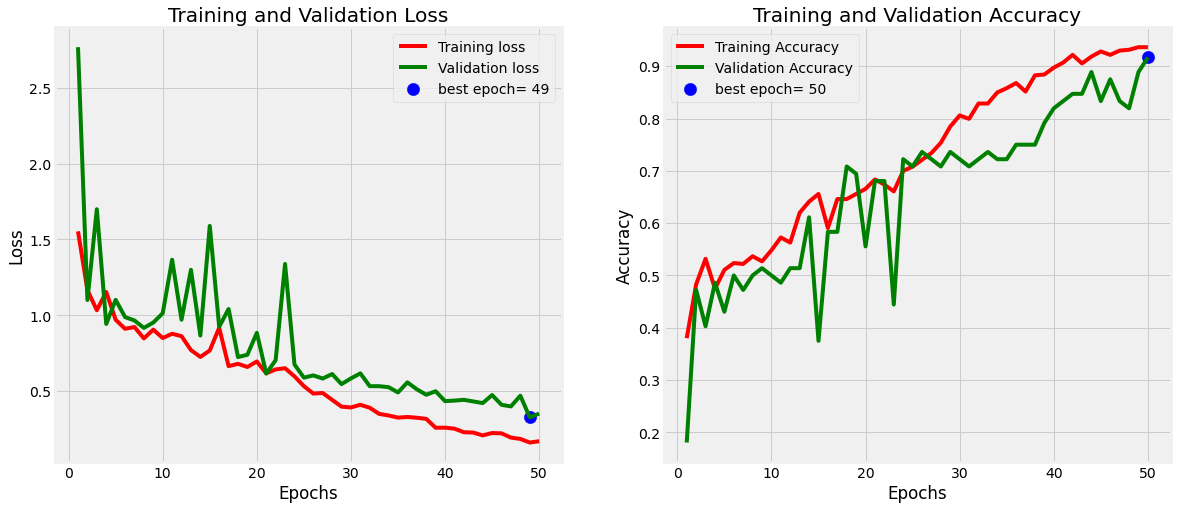

In [ ]:
plot_training(history)

In [ ]:
# from keras.models import load_model
# model = load_model('/kaggle/working/Final_Project/new_data/models/Ensemble/model.hdf5')

In [ ]:
a = model.evaluate(test_generator)

40/40 [==============================] - 93s 2s/step - loss: 0.3445 - accuracy: 0.8730 - precision: 0.2856 - recall: 1.0000


In [ ]:
import pickle

# some_obj = {'loss':a[0], 'accuracy':a[1], 'precision':a[2], 'recall':a[3], 'cm':cm}
some_obj = {'loss':a[0], 'accuracy':a[1], 'precision':a[2], 'recall':a[3]}

In [ ]:
some_obj

{'loss': 0.34448713064193726,
 'accuracy': 0.8730158805847168,
 'precision': 0.28558477759361267,
 'recall': 1.0}

In [ ]:
with open('/content/drive/MyDrive/CSE572-DM/Final_Project/new_data/models/' + 'hybrid/' +'metrics.pickle', 'wb') as f:
    pickle.dump(some_obj, f)

In [ ]:
# !cp /content/*.hdf5 '/content/drive/MyDrive/CSE572-DM/Final_Project/new_data/models/hybrid/'

In [ ]:
# t = model.predict(test_generator)

In [ ]:
# true_labels = test_generator.classes
# predictions = model.predict_generator(test_generator)

In [ ]:
# y_true = true_labels
# y_pred = np.array([np.argmax(x) for x in predictions])

In [ ]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_true, y_pred)

In [ ]:
# cm

In [ ]:
# import seaborn as sn
# import pandas as pd
# import matplotlib.pyplot as plt

# df_cm = pd.DataFrame(cm, index = [i for i in "ABCD"],
#                   columns = [i for i in "ABCD"])
# plt.figure(figsize = (10,7))
# sn.heatmap(df_cm, annot=True)